In [7]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Make some fake data to perform linear regression on 

In [39]:
x = np.random.normal(0.0, 1.0, 1000)
y = 3.0 + ((x) + np.random.normal(-0.0, 0.5, 1000))

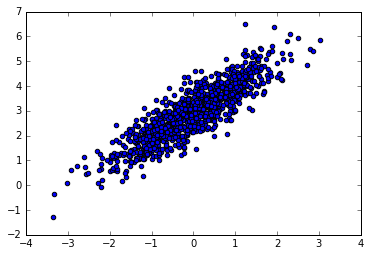

In [40]:
plt.scatter(x,y)